# NBFI Vehicle loan repayment Analyze

#Additionally library 

missingno

In [146]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import tensorflow as tf
import missingno as msno
from tensorflow import keras
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [147]:
data = pd.read_csv('nbfi_vehicle_loan_repayment_dataset/Train_Dataset.csv')

C:\Users\PaleBlue\AppData\Local\Temp\ipykernel_26044\66832030.py:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('nbfi_vehicle_loan_repayment_dataset/Train_Dataset.csv')


## EDA 

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

<Axes: >

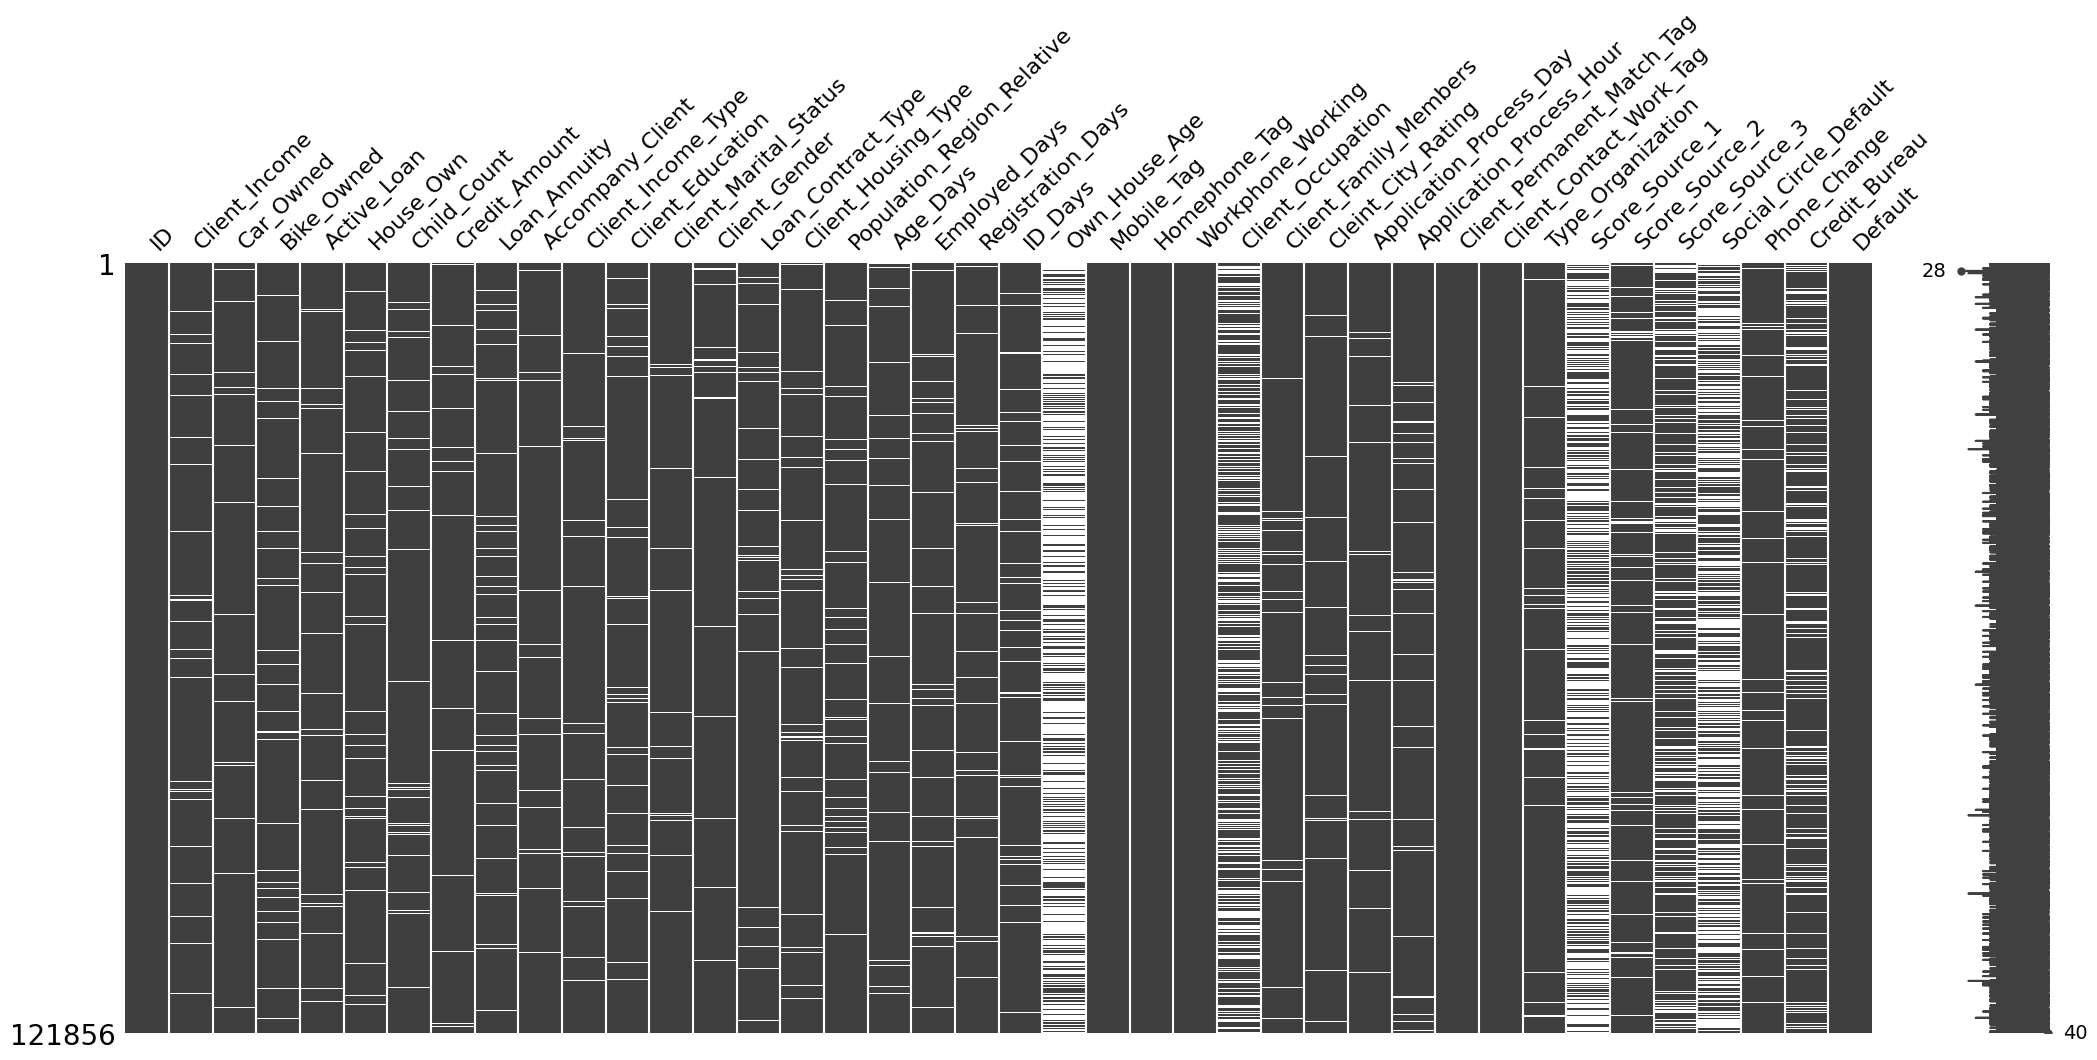

In [150]:
msno.matrix(data)

In [152]:
data = data.astype({'Client_Income':float})

In [153]:
data['log_Client_Income'] = np.log1p(data['Client_Income'])

In [154]:
data.groupby('Default').agg({'Client_Income':('mean', 'median', 'std','var', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75))})

Client_Income                                                  \
                 mean   median           std           var <lambda_0>   
Default                                                                 
0        16936.813918  14850.0  11777.511829  1.387098e+08    11250.0   
1        16025.019104  13500.0   8318.928690  6.920457e+07    11250.0   

                    
        <lambda_1>  
Default             
0          20250.0  
1          19350.0

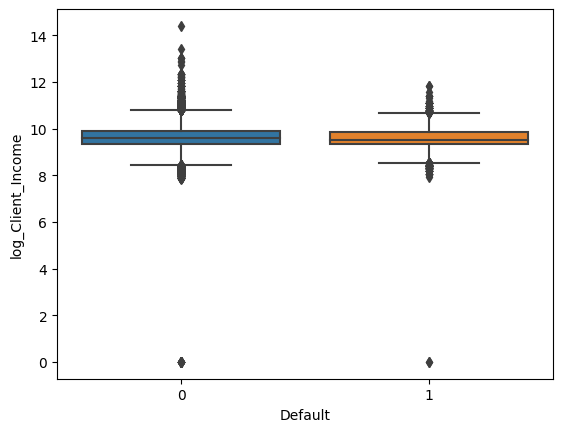

In [155]:
sns.boxplot(data=data, x='Default', y='log_Client_Income')
plt.show()

In [156]:
data.columns

Index(['ID', 'Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan',
       'House_Own', 'Child_Count', 'Credit_Amount', 'Loan_Annuity',
       'Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Population_Region_Relative', 'Age_Days',
       'Employed_Days', 'Registration_Days', 'ID_Days', 'Own_House_Age',
       'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default', 'log_Client_Income'],
      dtype='object')

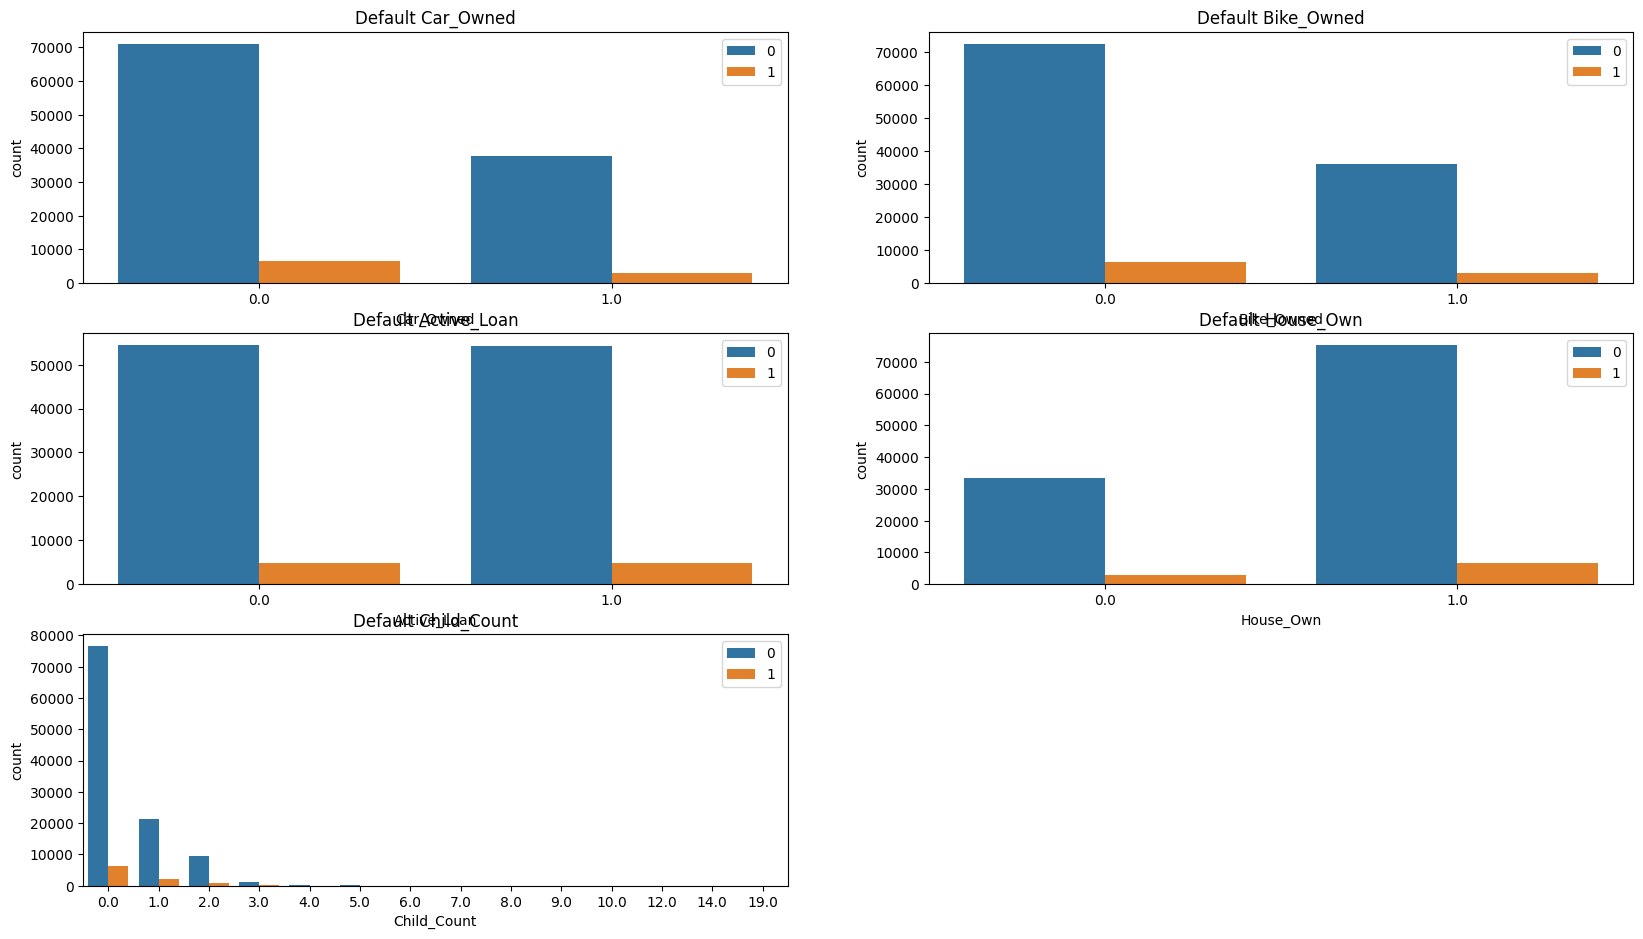

In [157]:
plt.figure(figsize=(20,15))
for i in range(2,7):
    plt.subplot(4,2,i-1)
    sns.countplot(data=data, x=data.columns[i], hue='Default',)
    plt.legend()
    plt.title(f'Default {data.columns[i]}')
plt.show()


In [158]:
data[data.House_Own.isnull()]['Own_House_Age']


1          0.0
129       13.0
140        NaN
153        4.0
186        6.0
          ... 
121725     NaN
121745     NaN
121795     NaN
121799     2.0
121832     NaN
Name: Own_House_Age, Length: 3661, dtype: float64

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  float64
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [160]:
data.isnull().sum()[data.isnull().sum()>0]

Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating             2409
Application_Process_Day        2428
Application_Process_Hour       3663
Type_Organization              3609
Score_Source_1              

In [161]:
categorical_columns = ['ID',
                       'Car_Owned',
                       'Bike_Owned',
                       'Active_Loan',
                       'House_Own',
                       'Accompany_Client',
                       'Client_Income_Type',
                       'Client_Education',
                       'Client_Marital_Status',
                       'Client_Gender',
                       'Loan_Contract_Type',
                       'Client_Housing_Type',
                       'Mobile_Tag',
                       'Homephone_Tag',
                       'Workphone_Working',
                       'Client_Occupation',
                       'Cleint_City_Rating',
                       'Application_Process_Day',
                       'Application_Process_Hour',
                       'Client_Permanent_Match_Tag',
                       'Client_Contact_Work_Tag',
                       'Type_Organization'
                       ]


In [162]:
len(categorical_columns)

22

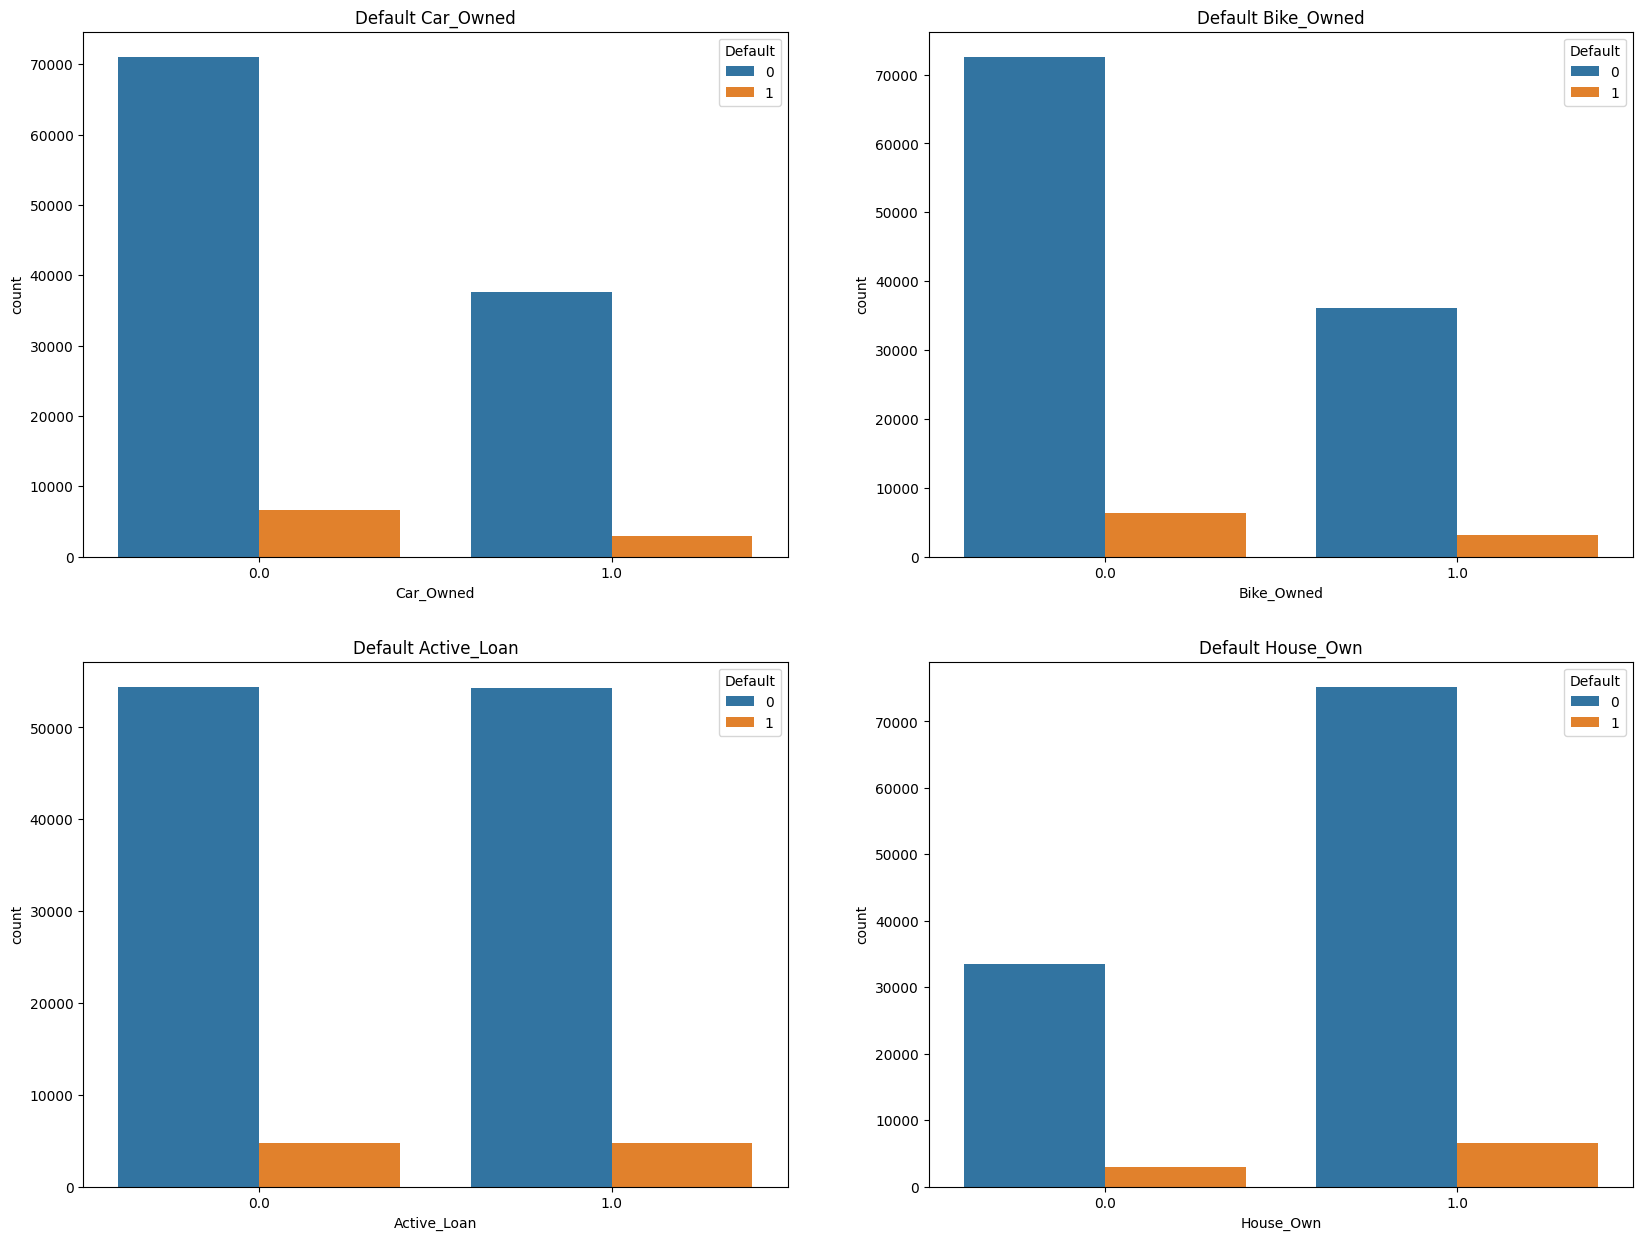

In [163]:
plt.figure(figsize=(20,15))
i = 1
for col in categorical_columns[1:5]:
    plt.subplot(2,2,i)
    i+=1
    sns.countplot(data=data, x=col, hue='Default',)
    plt.title(f'Default {col}')
plt.show()


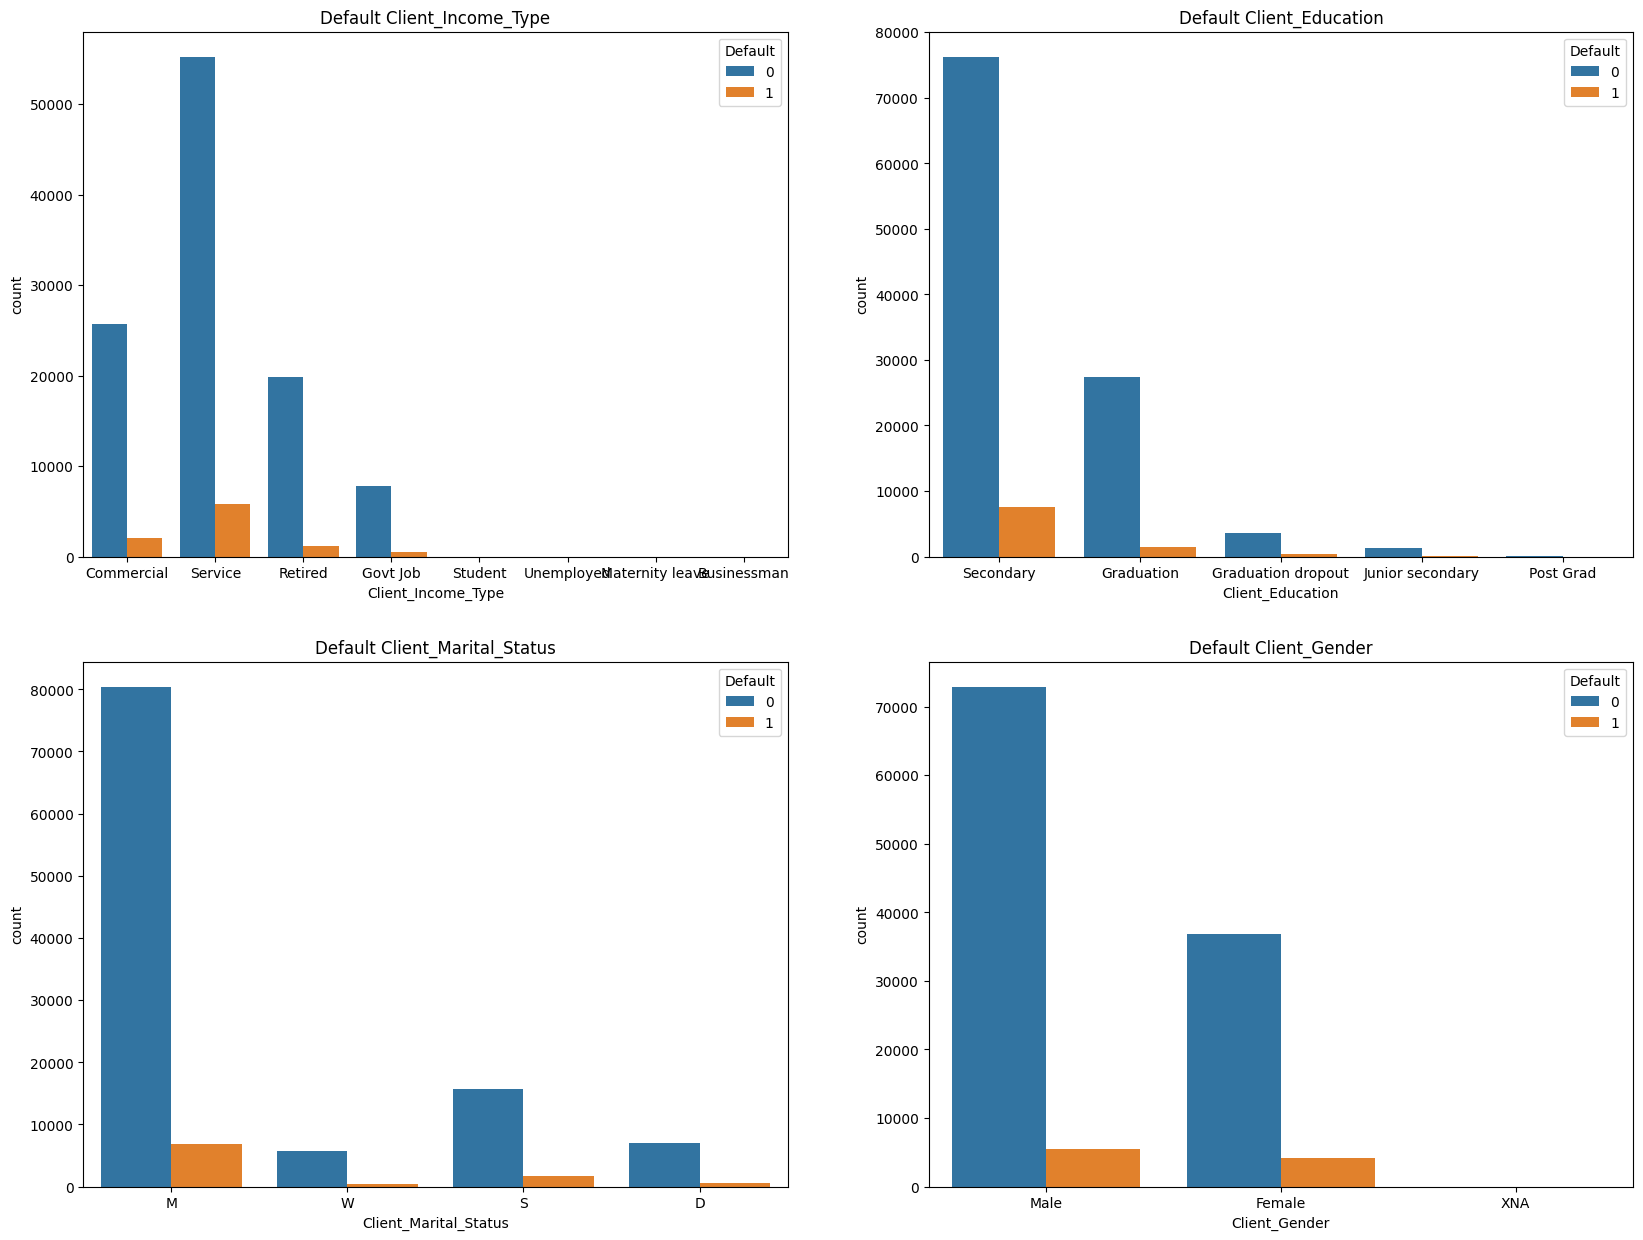

In [164]:
plt.figure(figsize=(20,15))
i = 1
for col in categorical_columns[6:10]:
    plt.subplot(2,2,i)
    i+=1
    sns.countplot(data=data, x=col, hue='Default',)
    plt.title(f'Default {col}')
plt.show()


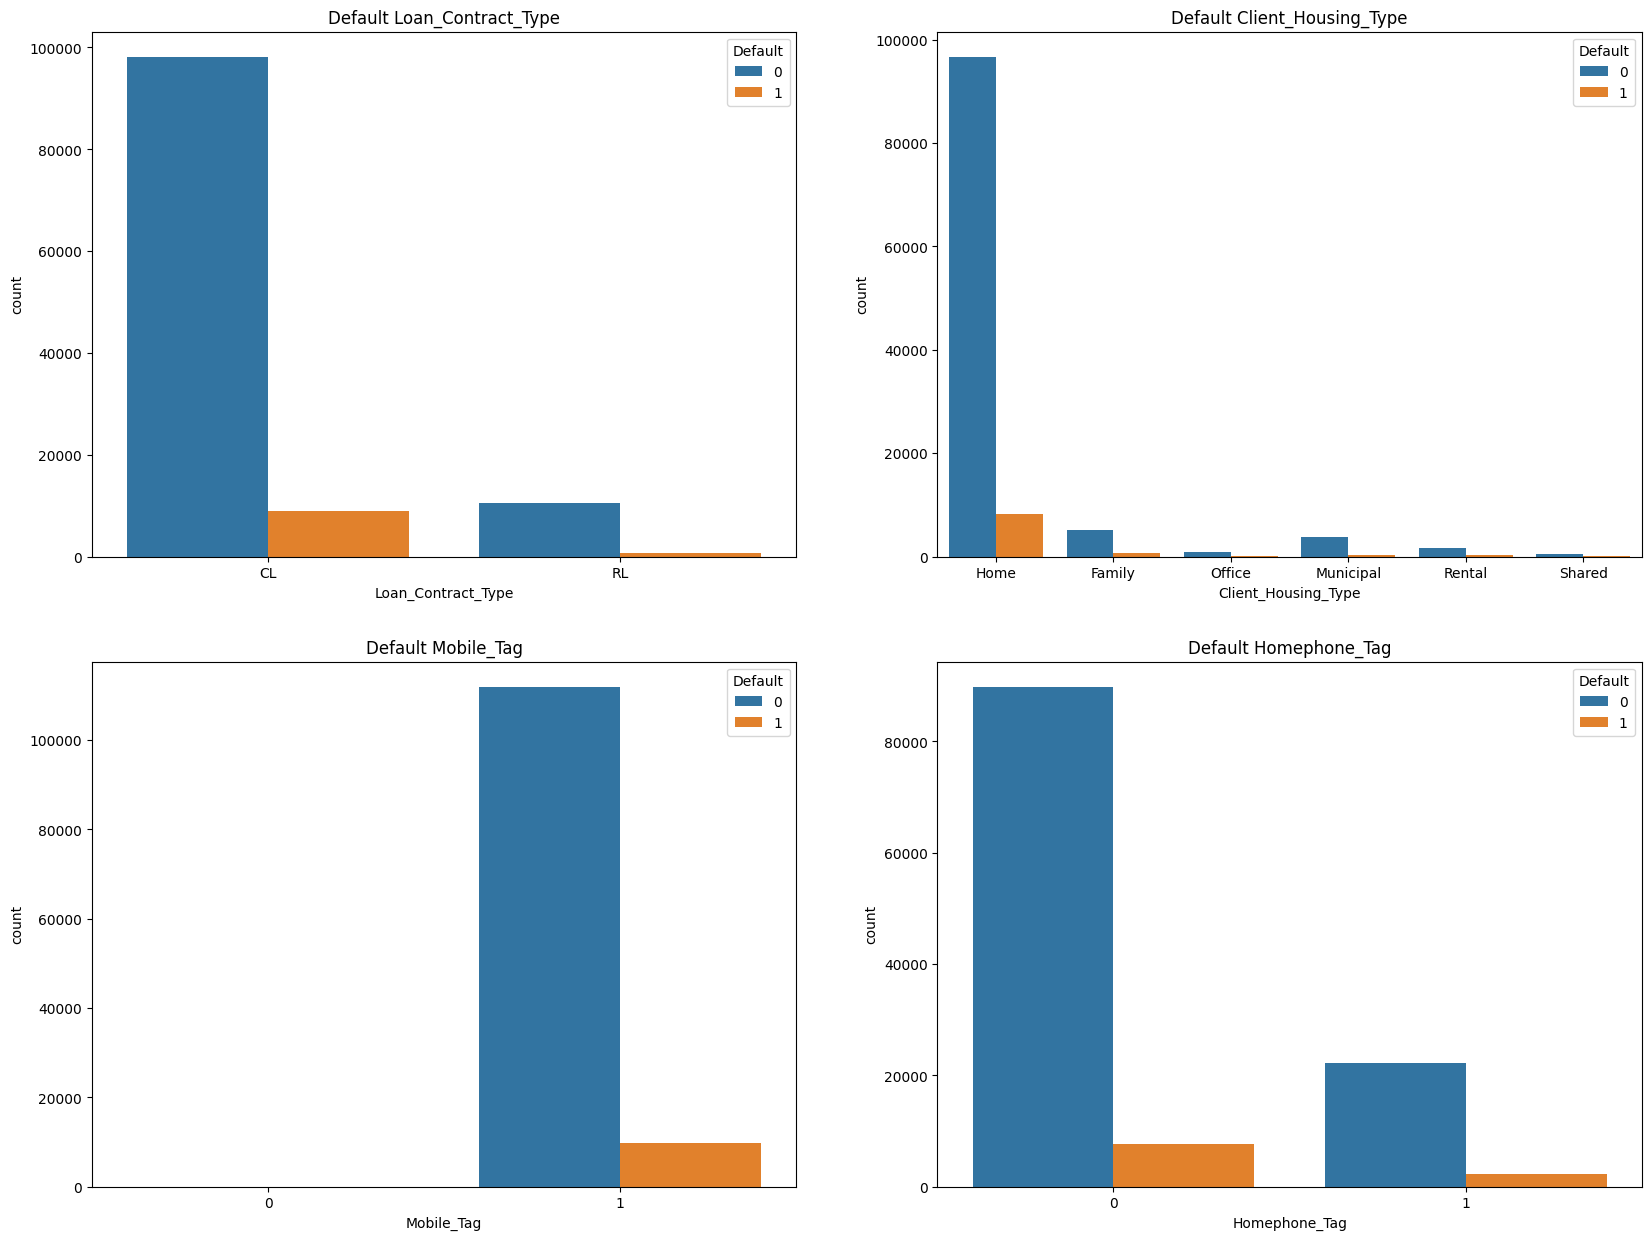

In [165]:
plt.figure(figsize=(20,15))
i = 1
for col in categorical_columns[10:14]:
    plt.subplot(2,2,i)
    i+=1
    sns.countplot(data=data, x=col, hue='Default',)
    plt.title(f'Default {col}')
plt.show()


Mobile Tag는 널값이 없고 다 1이므로 아무런 영향이 없으므로 열을 삭제

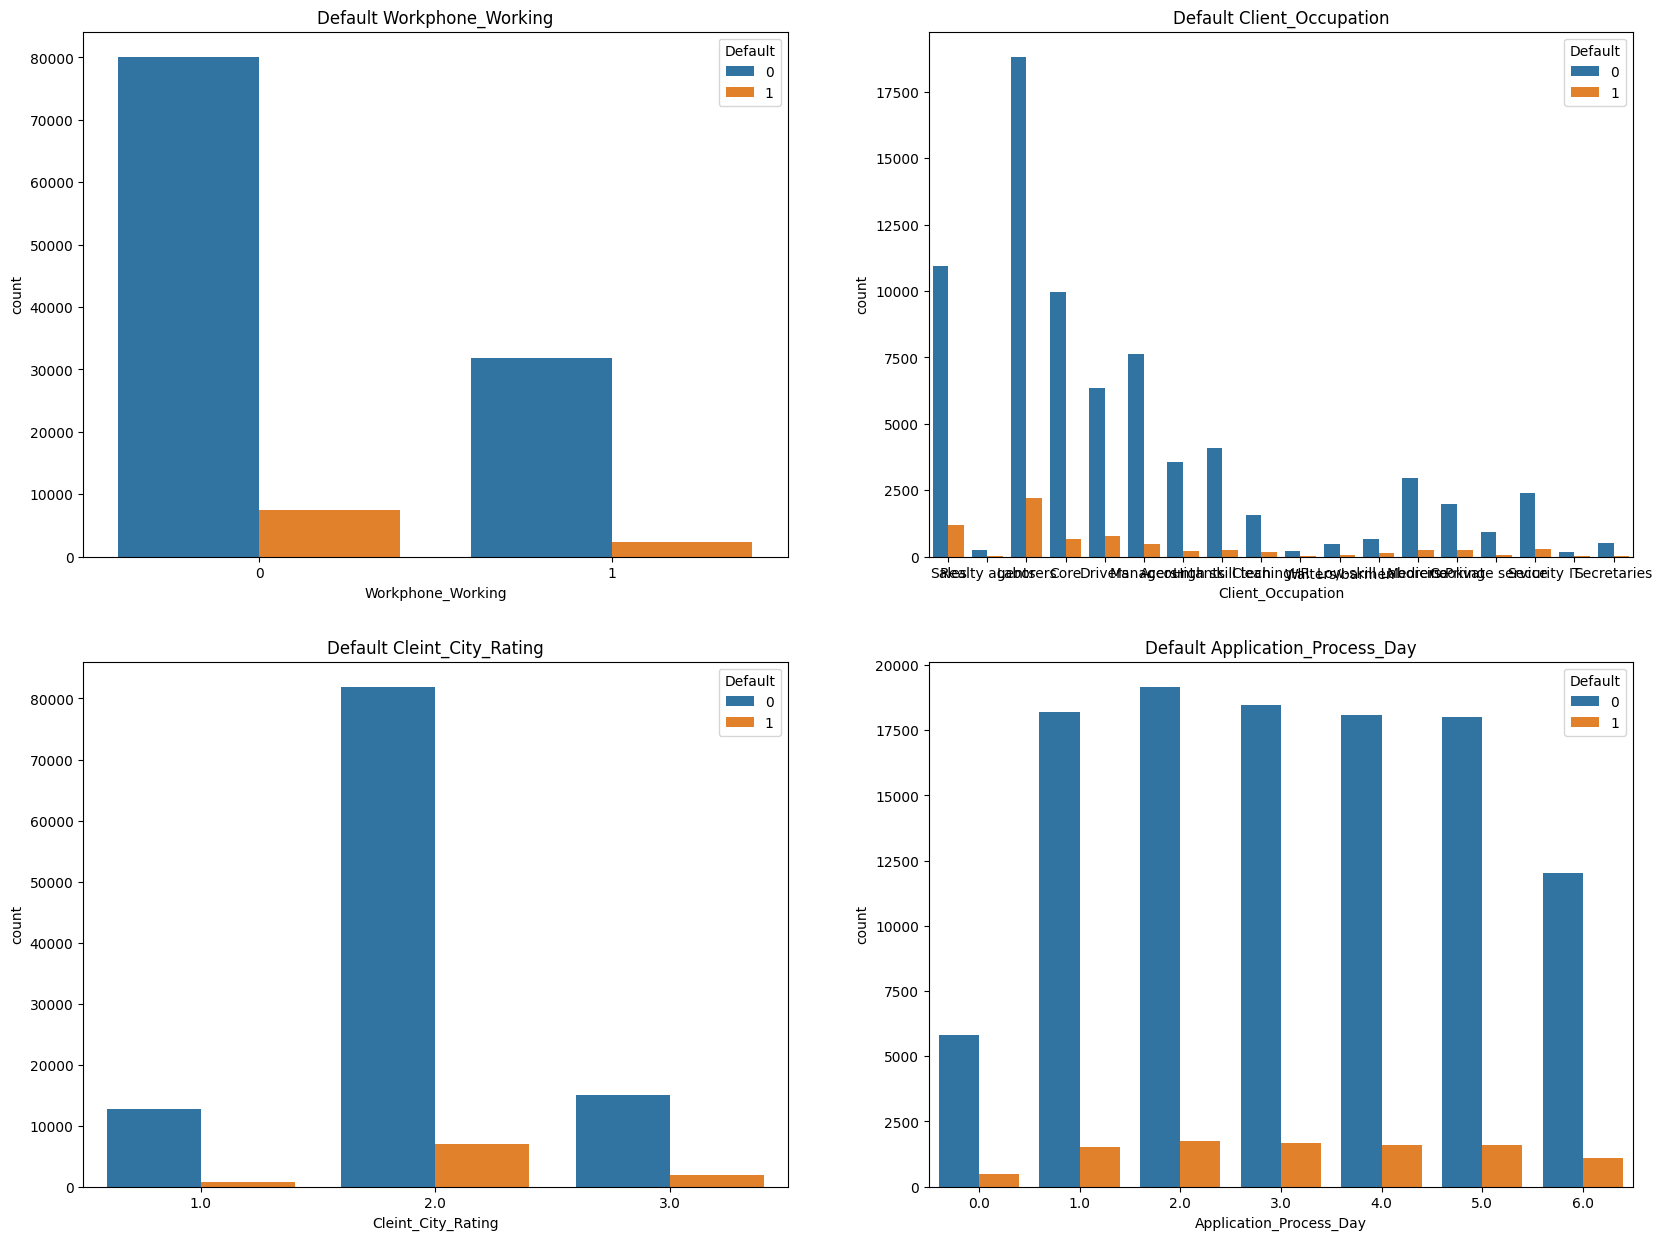

In [166]:
plt.figure(figsize=(20,15))
i = 1
for col in categorical_columns[14:18]:
    plt.subplot(2,2,i)
    i+=1
    sns.countplot(data=data, x=col, hue='Default',)
    plt.title(f'Default {col}')
plt.show()


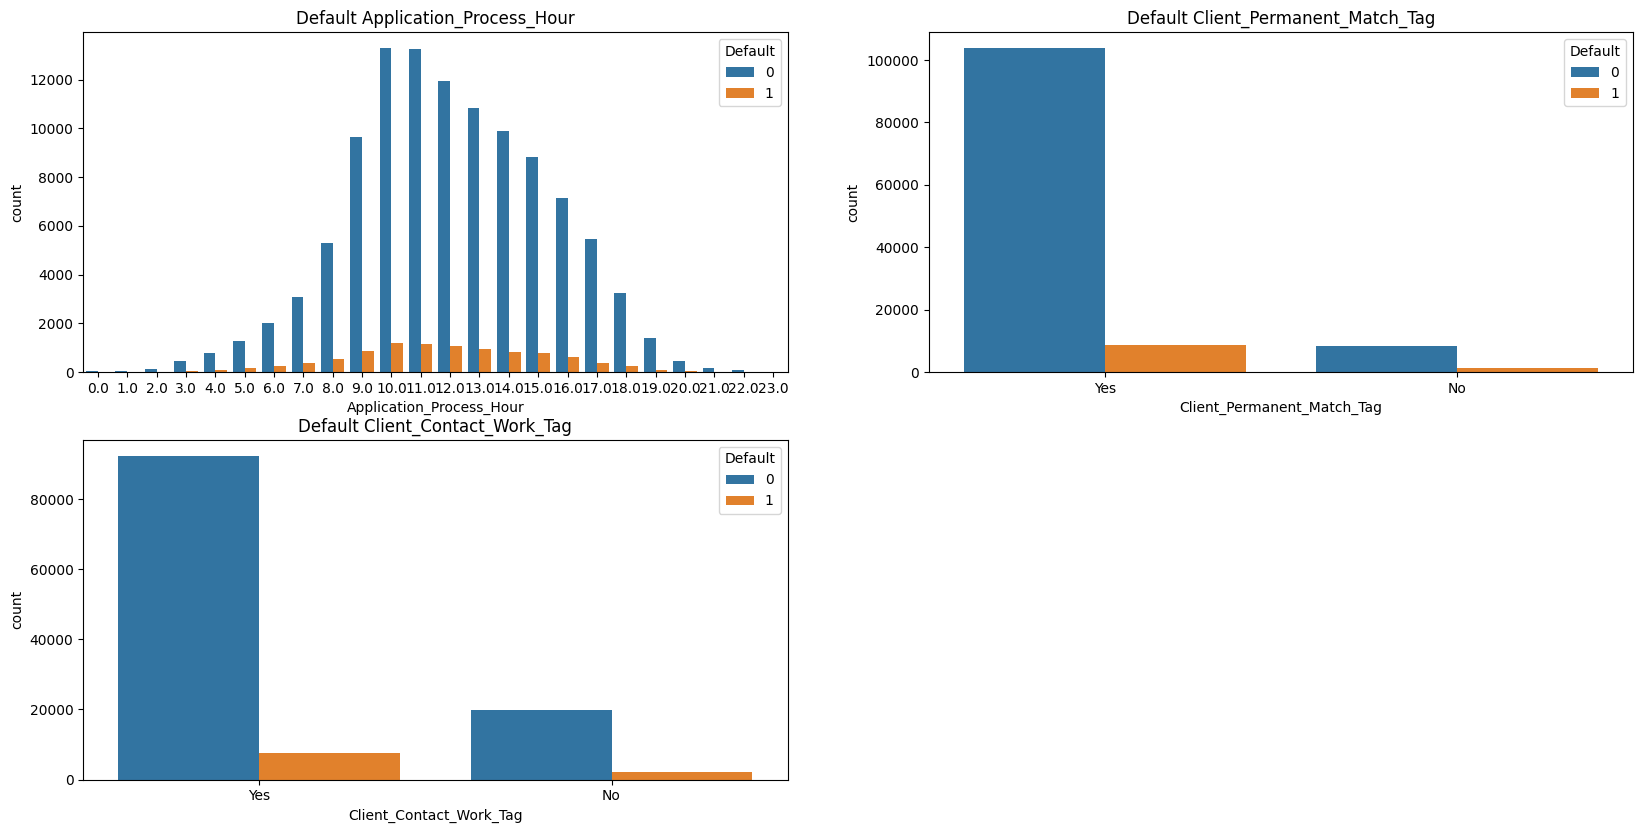

In [167]:
plt.figure(figsize=(20,15))
i = 1
for col in categorical_columns[18:21]:
    plt.subplot(3,2,i)
    i+=1
    sns.countplot(data=data, x=col, hue='Default',)
    plt.title(f'Default {col}')
plt.show()


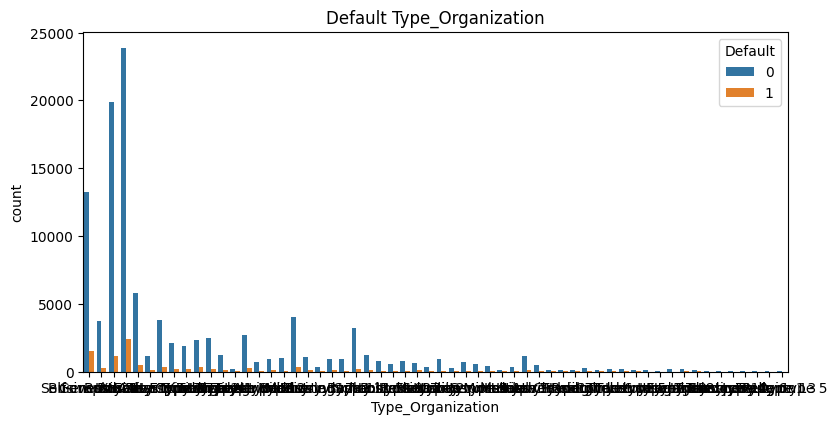

In [168]:
plt.figure(figsize=(20,15))
i = 1
for col in categorical_columns[21:]:
    plt.subplot(3,2,i)
    i+=1
    sns.countplot(data=data, x=col, hue='Default',)
    plt.title(f'Default {col}')
plt.show()


In [169]:
data.isnull().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

In [170]:
categorical_columns.remove('ID')

In [171]:
for col in categorical_columns:
    print(data.loc[:,col].value_counts())

0.0    77724
1.0    40551
Name: Car_Owned, dtype: int64
0.0    78948
1.0    39284
Name: Bike_Owned, dtype: int64
0.0    59208
1.0    59013
Name: Active_Loan, dtype: int64
1.0    81798
0.0    36397
Name: House_Own, dtype: int64
Alone       97409
Relative    15748
Partner      4516
Kids         1334
Others        987
Group         104
##             12
Name: Accompany_Client, dtype: int64
Service            61028
Commercial         27764
Retired            21043
Govt Job            8303
Student                8
Unemployed             6
Maternity leave        2
Businessman            1
Name: Client_Income_Type, dtype: int64
Secondary             83911
Graduation            28819
Graduation dropout     3960
Junior secondary       1455
Post Grad                66
Name: Client_Education, dtype: int64
M    87349
S    17404
D     7556
W     6074
Name: Client_Marital_Status, dtype: int64
Male      78463
Female    40977
XNA           3
Name: Client_Gender, dtype: int64
CL    107118
RL     11087


In [172]:
data.isna().sum() * 100 /len(data)

ID                             0.000000
Client_Income                  2.960051
Car_Owned                      2.938715
Bike_Owned                     2.974002
Active_Loan                    2.983029
House_Own                      3.004366
Child_Count                    2.985491
Credit_Amount                  2.980567
Loan_Annuity                   3.948923
Accompany_Client               1.432839
Client_Income_Type             3.037191
Client_Education               2.991236
Client_Marital_Status          2.850085
Client_Gender                  1.980206
Loan_Contract_Type             2.996159
Client_Housing_Type            3.025702
Population_Region_Relative     3.985852
Age_Days                       2.954307
Employed_Days                  2.994518
Registration_Days              2.965796
ID_Days                        4.897584
Own_House_Age                 65.729221
Mobile_Tag                     0.000000
Homephone_Tag                  0.000000
Workphone_Working              0.000000


In [173]:
na_cat_value_dicts = {
    'Car_Owned':2,
    'Bike_Owned':2,
    'Active_Loan':2,
    'House_Own' : 2, # 더미값 대체
    'Accompany_Client':'##', # 더미값 으로 대체
    'Client_Income_Type':'NA',
    'Client_Education' : 'NA',
    'Client_Marital_Status' : 'NA',
    'Client_Gender' : 'XNA',
    'Loan_Contract_Type': 'NA',
    'Client_Housing_Type' : 'NA',
    'Mobile_Tag' : 2,
    'Homephone_Tag' : 2,
    'Workphone_Working' : 2,
    'Client_Occupation' : 'NA',
    'Cleint_City_Rating' : 2,  # 최빈값
    'Application_Process_Day' : 2, # 계약 요일 최빈값 
    'Application_Process_Hour' : 10 , # 계약 시간
    'Client_Permanent_Match_Tag' : 'NA', 
    'Client_Contact_Work_Tag' : 'NA',
    'Type_Organization' : 'XNA'
}

In [174]:
data.Accompany_Client.value_counts()

Alone       97409
Relative    15748
Partner      4516
Kids         1334
Others        987
Group         104
##             12
Name: Accompany_Client, dtype: int64

In [175]:
for col,val in na_cat_value_dicts.items():
    data[col] = data[col].fillna(val)

In [176]:
data.isna().sum()

ID                                0
Client_Income                  3607
Car_Owned                         0
Bike_Owned                        0
Active_Loan                       0
House_Own                         0
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client                  0
Client_Income_Type                0
Client_Education                  0
Client_Marital_Status             0
Client_Gender                     0
Loan_Contract_Type                0
Client_Housing_Type               0
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation                 0
Client_Family_Members          2410
Cleint_City_Rating          

In [177]:
data.isna().sum()

ID                                0
Client_Income                  3607
Car_Owned                         0
Bike_Owned                        0
Active_Loan                       0
House_Own                         0
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client                  0
Client_Income_Type                0
Client_Education                  0
Client_Marital_Status             0
Client_Gender                     0
Loan_Contract_Type                0
Client_Housing_Type               0
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation                 0
Client_Family_Members          2410
Cleint_City_Rating          

In [178]:
numeri_datas_cols = [
    'Client_Income',
    'Credit_Amount',
    'Loan_Annuity',
    'Child_Count',
    'Population_Region_Relative',
    'Age_Days',
    'Employed_Days',
    'Registration_Days',
    'ID_Days',
    'Own_House_Age',
    'Client_Family_Members',
    'Score_Source_1',
    'Score_Source_2',
    'Score_Source_3',
    'Social_Circle_Default',
    'Phone_Change',
    'Credit_Bureau'
]

In [179]:
data[numeri_datas_cols].head(10)

,Client_Income,Credit_Amount,Loan_Annuity,Child_Count,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Own_House_Age,Client_Family_Members,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau
0,6750.0,61190.55,3416.85,0.0,0.028663,13957,1062,6123,383,NaN,2.0,0.568066,0.478787,NaN,0.0186,63.0,NaN
1,20250.0,15282,1826.55,0.0,0.008575,14162,4129,7833,21,0.0,2.0,0.563360,0.215068,NaN,NaN,NaN,NaN
2,18000.0,59527.35,2788.2,1.0,0.0228,16790,5102,NaN,331,NaN,2.0,NaN,0.552795,0.329655,0.0742,277.0,0.0
3,15750.0,53870.4,2295.45,0.0,0.010556,23195,365243,NaN,775,NaN,2.0,NaN,0.135182,0.631355,NaN,1700.0,3.0
4,33750.0,133988.4,3547.35,2.0,0.020713,11366,2977,5516,4043,6.0,4.0,0.508199,0.301182,0.355639,0.2021,674.0,1.0
5,11250.0,13752,653.85,1.0,0.019101,13881,1184,3910,3910,NaN,2.0,NaN,0.697928,0.420611,0.0639,739.0,0.0
6,15750.0,128835,3779.55,0.0,0.016612,21323,365243,113,4855,10.0,1.0,0.729913,0.602545,0.511892,0.2041,0.0,3.0
7,13500.0,60415.2,3097.8,0.0,0.009175,22493,365243,12617,5280,NaN,2.0,0.711468,0.657508,0.549597,NaN,1687.0,4.0
8,13500.0,45000,1200.15,1.0,0.006008,NaN,7889,5455,2665,14.0,3.0,0.475727,0.637594,0.553165,0.1670,1611.0,0.0
9,12150.0,16320.15,1294.65,0.0,0.016612,20507,365243,2834,4053,NaN,1.0,0.682285,0.063343,0.08065,NaN,533.0,5.0


In [180]:
data.Score_Source_1

0         0.568066
1         0.563360
2              NaN
3              NaN
4         0.508199
            ...   
121851         NaN
121852         NaN
121853    0.169049
121854    0.182737
121855         NaN
Name: Score_Source_1, Length: 121856, dtype: float64

In [181]:
len(numeri_datas_cols)

17

In [182]:
na_values = ['$', '#VALUE!', '##', 'XNA', '@', '#', 'x', '&']

In [183]:
for col in numeri_datas_cols:
    data[col] = data[col].apply(lambda x : 0 if x in na_values else x)
    

In [184]:
data[numeri_datas_cols] =data[numeri_datas_cols].astype('float')

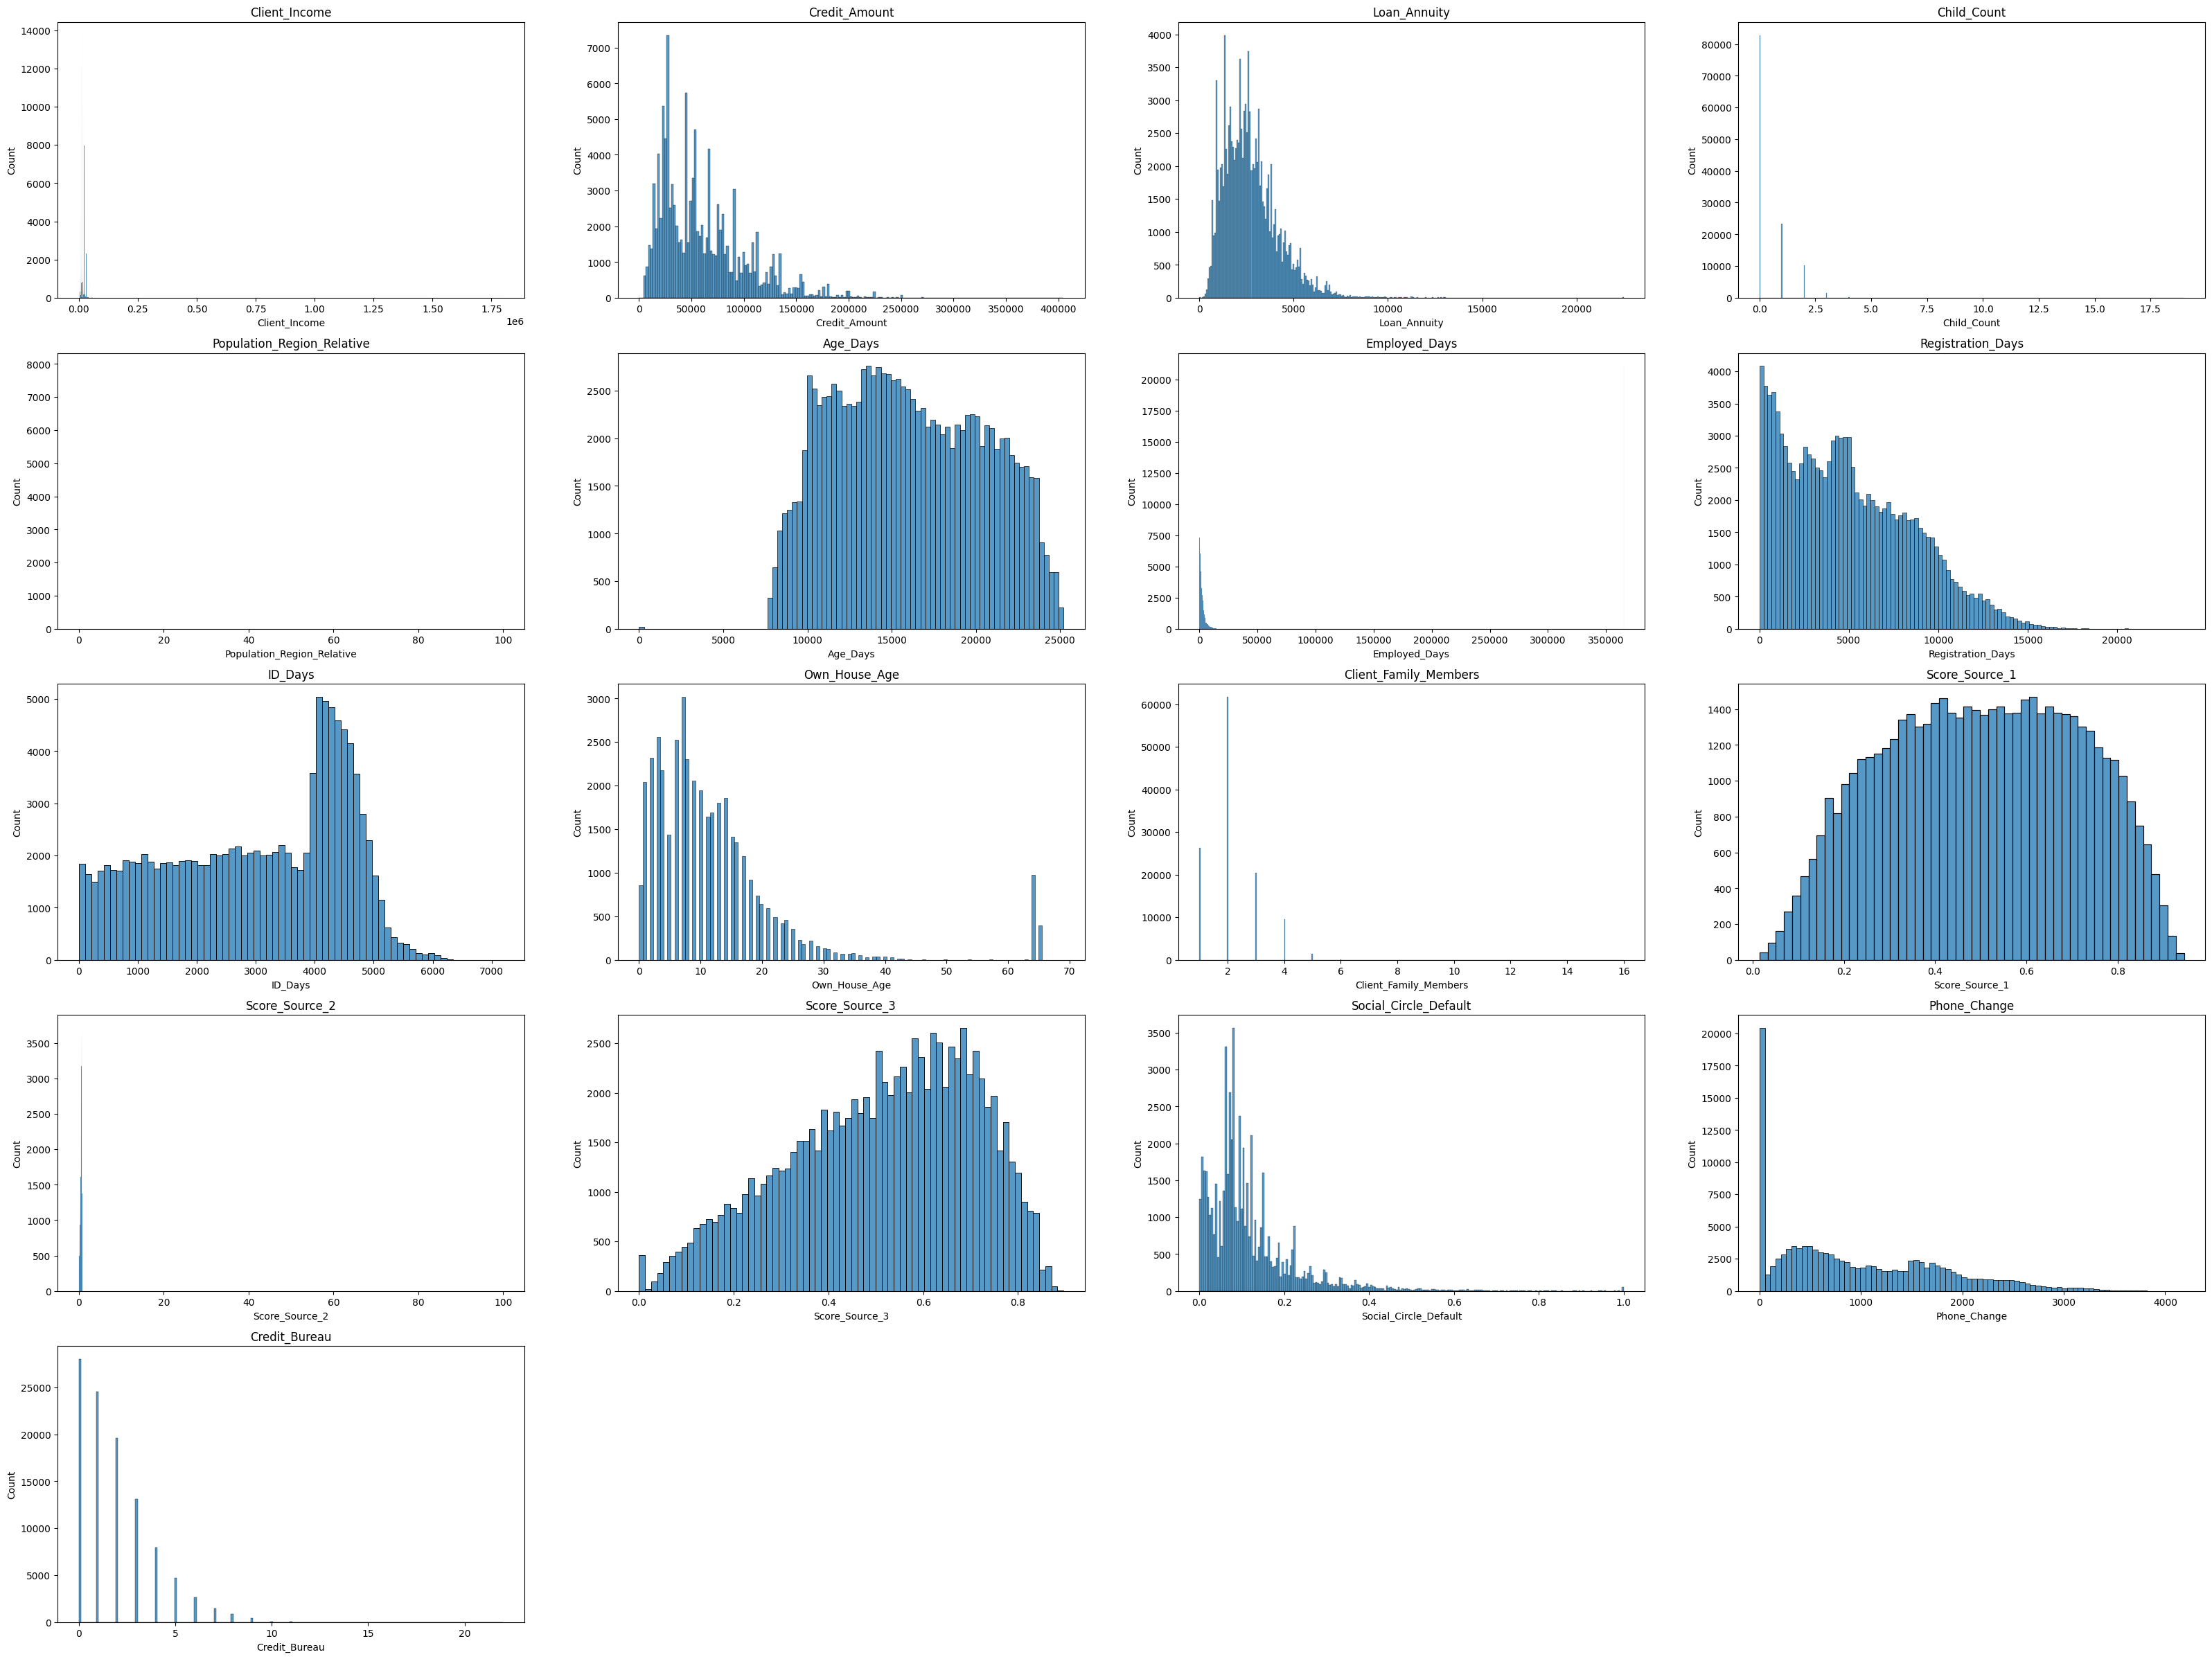

In [185]:
plt.figure(figsize=(40,30))
i = 1
for col in numeri_datas_cols:
    plt.subplot(5,4,i)
    i+=1
    sns.histplot(data[col])
    plt.title(f'{col}')
plt.show()


In [186]:
data.Score_Source_2 = data.Score_Source_2.apply(lambda x : 1 if x >=1 else x)

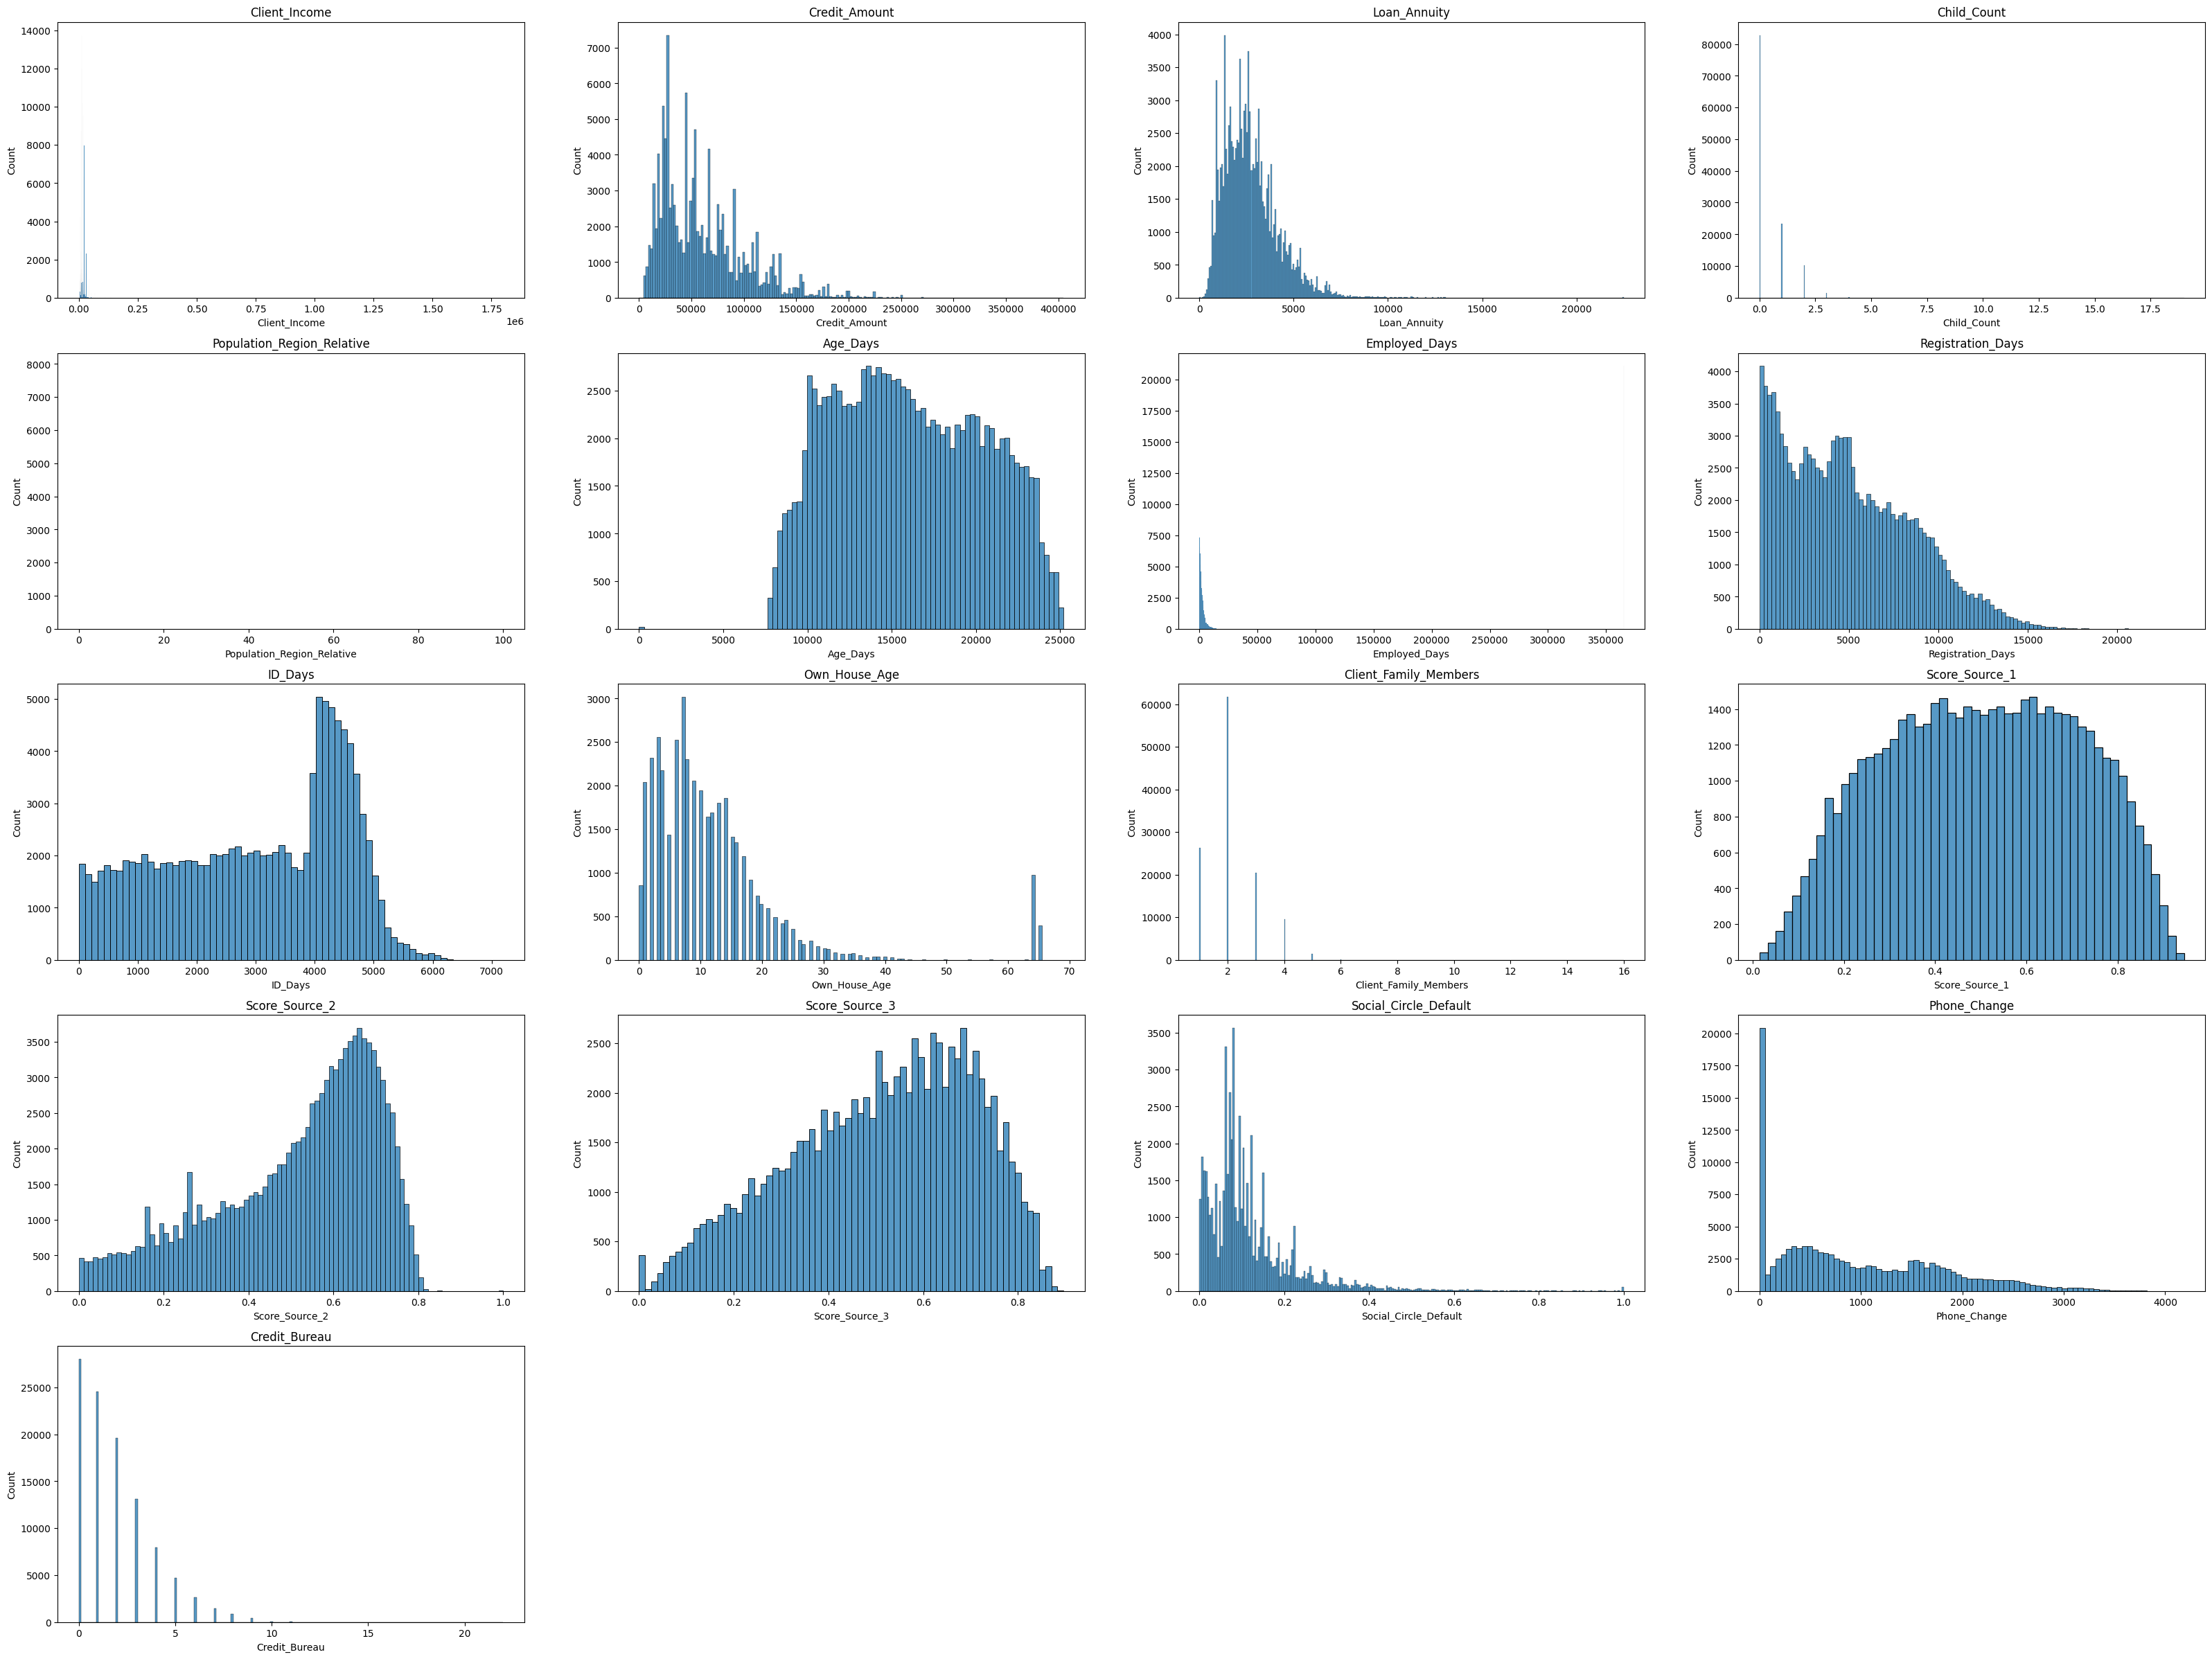

In [187]:
plt.figure(figsize=(40,30))
i = 1
for col in numeri_datas_cols:
    plt.subplot(5,4,i)
    i+=1
    sns.histplot(data[col])
    plt.title(f'{col}')
plt.show()


In [188]:
numeri_datas_cols_dicts = {
    'Client_Income' : 1.440000e+04,
    'Credit_Amount' :51750.000000, # 중앙값
    'Loan_Annuity' : 2499.750000, # 중앙값
    'Child_Count' : 0 ,# '최빈값,
    'Population_Region_Relative': 0.018850, # 중앙값
    'Age_Days' : 15733, #중앙값
    'Employed_Days' : 2211, #중앙값
    'Registration_Days' :  4492, #중앙값
    'ID_Days' : 3242.000000, # 중앙값
    'Own_House_Age' : -1, # 더미값
    'Client_Family_Members':1, # 최빈값
    'Score_Source_1' : -1 , #더미값
    'Score_Source_2' : 0.564978, # 중앙값
    'Score_Source_3' : 0.537070, # 중앙값
    'Social_Circle_Default' : 0, # 대출갚지못한 수 0으로 처리
    'Phone_Change': 755.000000, #중앙값
    'Credit_Bureau' : 0 # 0
}

In [189]:
data.corr().loc[['Score_Source_1',
    'Score_Source_2',
    'Score_Source_3',]]

C:\Users\PaleBlue\AppData\Local\Temp\ipykernel_26044\898647358.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().loc[['Score_Source_1',


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Population_Region_Relative,...,Application_Process_Day,Application_Process_Hour,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default,log_Client_Income
Score_Source_1,-0.001940,0.070577,-0.048514,-0.007109,-0.004484,0.068601,-0.135047,0.165994,0.121556,0.002366,...,0.002446,0.036579,1.000000,0.218795,0.188195,0.055004,0.136430,0.011563,-0.146809,0.077687
Score_Source_2,-0.004642,0.132500,0.046567,-0.001877,-0.001235,0.000879,-0.015527,0.130171,0.122977,0.007202,...,-0.000810,0.154692,0.218795,1.000000,0.110494,0.089396,0.197314,-0.026282,-0.155319,0.164464
Score_Source_3,-0.004333,-0.070195,-0.005856,-0.005529,0.003124,0.031692,-0.040470,0.040742,0.026380,-0.004405,...,0.001500,-0.040027,0.188195,0.110494,1.000000,0.005207,0.071003,-0.075304,-0.175590,-0.089355


In [190]:
data['Score_Source_3'].describe()

count    94935.000000
mean         0.511174
std          0.194339
min          0.000000
25%          0.372334
50%          0.537070
75%          0.667458
max          0.896010
Name: Score_Source_3, dtype: float64

In [191]:
data.Population_Region_Relative = data.Population_Region_Relative.apply(lambda x : 1 if x >=1 else x)

In [192]:
for col,val in numeri_datas_cols_dicts.items():
    data[col] = data[col].fillna(val)

In [193]:
data.isnull().sum()

ID                               0
Client_Income                    0
Car_Owned                        0
Bike_Owned                       0
Active_Loan                      0
House_Own                        0
Child_Count                      0
Credit_Amount                    0
Loan_Annuity                     0
Accompany_Client                 0
Client_Income_Type               0
Client_Education                 0
Client_Marital_Status            0
Client_Gender                    0
Loan_Contract_Type               0
Client_Housing_Type              0
Population_Region_Relative       0
Age_Days                         0
Employed_Days                    0
Registration_Days                0
ID_Days                          0
Own_House_Age                    0
Mobile_Tag                       0
Homephone_Tag                    0
Workphone_Working                0
Client_Occupation                0
Client_Family_Members            0
Cleint_City_Rating               0
Application_Process_

In [194]:
data.drop('log_Client_Income',axis=1, inplace=True)

In [197]:
data.drop('ID',axis=1, inplace=True)

In [198]:
data.to_csv('after_pre.csv',index=False)

In [199]:
data.isnull().sum()

Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Credit_Amount                 0
Loan_Annuity                  0
Accompany_Client              0
Client_Income_Type            0
Client_Education              0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Population_Region_Relative    0
Age_Days                      0
Employed_Days                 0
Registration_Days             0
ID_Days                       0
Own_House_Age                 0
Mobile_Tag                    0
Homephone_Tag                 0
Workphone_Working             0
Client_Occupation             0
Client_Family_Members         0
Cleint_City_Rating            0
Application_Process_Day       0
Application_Process_Hour      0
Client_Permanent_Match_Tag    0
Client_Contact_Work_Tag       0
Type_Org

In [203]:
len(data.columns)

39

In [204]:
len(na_cat_value_dicts.keys())

21

In [205]:
len(numeri_datas_cols_dicts.keys())

17

In [207]:
data.drop('Mobile_Tag', axis =1 ,inplace =True)

In [208]:
data.to_csv('after_pre_final',index=False)